<a href="https://colab.research.google.com/github/hoangnuthuphuong/Machine_Learning/blob/main/C4_BaiTapTaiLop1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Xây dựng mô hình hồi quy Logistic với thuật toán Gradient descent, yêu cầu:**
- Hoàn thiện bảng phân tích Toán - Python (gửi lại file word đã điền đầy đủ trong phần trả lời bài tập)
- Xây dựng chương trình hoàn chỉnh (gửi code trong phần trả lời bài tập)
- Sử dụng tập tin dữ liệu được cung cấp trong bài tập

In [53]:
# Các thư viện
import numpy as  np
import os
from matplotlib import pyplot as plt

In [54]:
# Kết nối với drive 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Hoàn thiện bảng phân tích Toán - Python**

**1.** Tập dữ liệu $𝐷 =  {(𝑥_𝑖, 𝑦_𝑖)| 𝑥_𝑖   ∈ 𝑅^𝑛, 𝑦_𝑖   ∈  {0,1}, ∀𝑖 = ̅1̅̅,̅𝑚̅̅    }.$

Lấy ra $𝑋 =  {𝑥_𝑖| 𝑥_𝑖   ∈ 𝑅^𝑛, ∀𝑖 = ̅1̅̅,̅𝑚̅̅ }$ và $𝑦 = {𝑦_𝑖| 𝑦_𝑖   ∈  {0,1}, ∀𝑖 =   ̅ ̅1̅,𝑚̅ }$ từ tập D.
Ghi chú:
- 𝑋 ∈ 𝑅𝑚×𝑛
- 𝑦 ∈ {0,1}𝑚×1

**2.** Chuyển đổi không gian của X từ $𝑅^𝑛$ sang $𝑅^{𝑛+1}$ bằng cách thêm 1 cột chứa các giá trị 1 vào bên trái ma trận X.

-	Tạo vector (ma trận 𝑚 × 1) chứa các số $1, 𝑥_0$ = 
$\begin{bmatrix}
x_{01} = 1\\
⋮	\\
x_{0m} = 1
\end{bmatrix}$

-	Tạo ma trận X mới: $𝑋 = [𝑥_0, 𝑋]$
Ghi chú: lúc này $𝑋 ∈ 𝑅^{𝑚×𝑛}$ (ngầm hiểu $n = n + 1$)



In [55]:
def readData(filePath: str, filename: str):
    data = np.loadtxt(os.path.join(filePath, filename), delimiter = ',')
    X = data[:,:-1]
    y = data[:, -1]
    m = X.shape[0]
    n = X.shape[1]
    X = np.reshape(X, (m,n))
    y = np.reshape(y, (m,1))
    # Tạo vector (ma trận 𝑚 × 1) chứa các số 1
    x0 = np.ones((m,1))
    # Thêm cột x0 vào bên trái ma trận X
    X = np.column_stack([x0, X])
    return X, y

**3.** Về lý thuyết ta có:
$h_w(x)= \frac{1}{1+ 𝑒^{−(𝑤_0.𝑥_0+ 𝑤_1𝑥_1+ ⋯+ 𝑤_𝑛𝑥_𝑛)}}$ (1)
hay
$h_w(x)= \frac{1}{1+ 𝑒^{−𝑤^T𝑥}}$ (2)
với: 
$𝑤 ∈ 𝑅^{𝑛×1}, 𝑥  ∈  𝑅^{𝑛×1}$

Viết lại (1) và (2) dưới dạng phép toán ma trận
$h_w(x)= \frac{1}{1+ 𝑒^{−Xw}}$ (3)
Ghi chú:
- $𝑋 ∈ 𝑅^{𝑚×𝑛}, 𝑤 ∈ 𝑅^{𝑛×1} → 𝑋.𝑤 ∈ 𝑅^{𝑚×1}$
- $ℎ_𝑤(𝑋) ∈ 𝑅^{𝑚×1}$

- Hãy lập trình Python tính giá trị h phương trình (gợi ý: hàm **np.exp()** – tính số mũ)



In [56]:
def sigmoid(X, w):
    result = 1/(1 + np.exp(-np.dot(X, w)))
    return result

**4.** Hàm mất mát:
$J(w)=-\frac{1}{m} \sum_{i=1}^m[y_i.log(h_w(x_i))+ (1-y_i).log(1-h_w(x_i))]$   (4)

$𝐽(𝑤) = − \frac{1}{m} ∑_{i=1}^m[𝑦^𝑇.log(ℎ_w(𝑋)) + (1 - 𝑦)^T.𝑙𝑜𝑔(1 − ℎ_w(𝑋))]$  (5)

Ghi chú:
-	$𝑦 ∈ 𝑅^{𝑚×1}  →  𝑦^𝑇 ∈ 𝑅{1×𝑚}$
-	$ℎ_𝑤(𝑋) ∈ 𝑅^{𝑚×1}  →  log(ℎ_𝑤(𝑋)) ∈ 𝑅^{𝑚×1}$
-	$(1 − 𝑦) ∈ 𝑅^{𝑚×1} → (1 − 𝑦)^𝑇 ∈ 𝑅^{1×𝑚}
-	$(1 − ℎ_𝑤(𝑋)) ∈ 𝑅^{𝑚×1} → 𝑙𝑜𝑔(1 − $ℎ_𝑤(𝑋)) ∈ 𝑅^{𝑚×1}$
-	$𝐽(𝑤) ∈ 𝑅$

-Hãy viết mã lệnh tính J(w) theo công thức (5)

In [57]:
def loss(X, y, w):
    m = y.shape[0]
    result = (-1/m)*np.sum(np.dot(y.T, np.log(sigmoid(X, w))) + np.dot((1 - y).T, np.log(1 - sigmoid(X, w))))
    return result

**5.** Theo lý thuyết, công thức tính đạo hàm riêng là:
$𝜕𝐽(𝑤) =  \frac{1}{m} ∑_{i=1}^m (ℎ_w (𝑥_i) − 𝑦_i).x_i$ (6)

Viết lại (6) theo phép toán ma trận:
$∇𝐽(𝑤) = \frac{1}{m}∑𝑋^𝑇(ℎ_w(𝑋)−𝑦)$ (7)

Ghi chú:
- $ℎ_𝑤(𝑋) ∈ 𝑅^{𝑚×1}, 𝑦 ∈ 𝑅^{𝑚×1} → (ℎ_𝑤(𝑋) − 𝑦) ∈ 𝑅^{𝑚×1}$
- $𝑋 ∈ 𝑅^{𝑚×𝑛} →  𝑋^𝑇 ∈ 𝑅{𝑛×𝑚}$
- $∇𝐽(𝑤) ∈ 𝑅^{𝑛×1}$ chính là cùng kích thước ma trận w


In [58]:
def gradient(X, y, w):
    m = X.shape[0]
    result = (1/m)*np.dot(X.T, sigmoid(X, w) - y)
    return result

**6.** Theo thuật toán Gradient descent, các trọng số được cập nhật theo công
thức 
$𝑤_i = 𝑤_i − 𝛼\frac{𝜕𝐽(𝑤)}{𝜕𝑤𝑖}, ∀𝑖$	(8)

Viết lại (8) dưới dạng phép toán ma trận:

$𝑤 = 𝑤 − 𝛼. ∇𝐽(𝑤)$	(9)

Ghi chú:
- $𝑤 ∈ 𝑅^{𝑛×1}, ∇𝐽(𝑤) ∈ 𝑅^{𝑛×1} → 𝑤 − 𝛼. ∇𝐽(𝑤) ∈ 𝑅^{𝑛×1}$

Hãy viết mã lệnh tính w theo công thức (9)

In [59]:
def gradientDescent(X, y, w, alpha, n_iters):
    w_optimal = w.copy()
    J_history = []
    for i in range(n_iters):
        w_optimal = w_optimal - alpha*gradient(X, y, w_optimal)
        J_history.append(loss(X, y, w_optimal))
    return w_optimal, J_history

# **Xây dựng chương trình hồi quy Logistic hoàn chỉnh**

In [60]:
def readData(filePath: str, filename: str):
    data = np.loadtxt(os.path.join(filePath, filename), delimiter = ',')
    X = data[:,:-1]
    y = data[:, -1]
    m = X.shape[0]
    n = X.shape[1]
    X = np.reshape(X, (m,n))
    y = np.reshape(y, (m,1))
    # Tạo vector (ma trận 𝑚 × 1) chứa các số 1
    x0 = np.ones((m,1))
    # Thêm cột x0 vào bên trái ma trận X
    X = np.column_stack([x0, X])
    return X, y

In [61]:
def sigmoid(X, w):
    result = 1/(1 + np.exp(-np.dot(X, w)))
    return result

In [62]:
def loss(X, y, w):
    m = y.shape[0]
    result = (-1/m)*np.sum(np.dot(y.T, np.log(sigmoid(X, w))) + np.dot((1 - y).T, np.log(1 - sigmoid(X, w))))
    return result
    

In [63]:
def gradient(X, y, w):
    m = X.shape[0]
    result = (1/m)*np.dot(X.T, sigmoid(X, w) - y)
    return result

In [64]:
def gradientDescent(X, y, w, alpha, n_iters):
    w_optimal = w.copy()
    J_history = []
    for i in range(n_iters):
        w_optimal = w_optimal - alpha*gradient(X, y, w_optimal)
        J_history.append(loss(X, y, w_optimal))
    return w_optimal, J_history

In [ ]:
def featureVectorScaling(data):
    avg = np.mean(data)
    sln = data.max()
    snn = data.min()
    data_scl = (data - avg)/(sln - snn)
    print(data_scl[1])
    return data_scl

In [ ]:
def normalizeData(X):
    X_scl = X[:, 0]
    for i in range(1, X.shape[1]):
        scl = featureVectorScaling(X[:, i])
        X_scl = np.column_stack([X_scl, scl])
    return X_scl

In [65]:
# Mô tả dữ liệu bằng plot 
def visualizeDataAndModel(X, y, w_optimal):
    fig = plt.figure()
    plt.plot(X[:,1], y, 'g^')
    plt.plot(X[:, 1], np.dot(X, w_optimal), 'r-')
    plt.legend(['Raw Data', 'Linear regression'])
    plt.ylabel('Profit in $10,000')
    plt.xlabel('Population of City in 10,000s')
    plt.show()

-0.5067801656080071
-0.3270580397857178
Kết quả : 
Trọng số tối ưu là:
 [[0.41683919]
 [1.31218868]
 [1.15423699]]
Giá trị Loss tối ưu:  0.5186665295508813


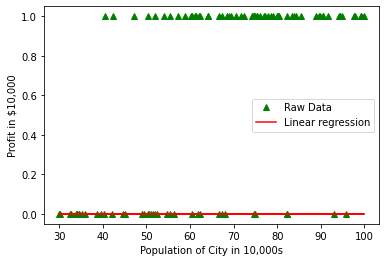

In [66]:
def main():
    X, y = readData('/content/gdrive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data1.txt')
    X_scl = normalizeData(X)
    n = X_scl.shape[1]
    w = np.zeros((n, 1))
    alpha = 0.01
    n_iters = 2000
    w_opt, J_hist = gradientDescent(X_scl, y, w, alpha, n_iters)
    print("Kết quả : ")
    print('Trọng số tối ưu là:\n', w_opt)
    print('Giá trị Loss tối ưu: ', J_hist[-1])
    visualizeDataAndModel(X, y, w)

if __name__ == "__main__":
    main()

# **Xây dựng chương trình hồi quy Logistic - OOP**
Ghi chú: Áp dụng 2 phương pháp chuẩn hóa dữ liệu:
-	Mean normalization
-	Max-Min normalization


In [ ]:
class Regression:
    def __init__(self):
        pass
    def loss(self, X, y, w):
        pass

In [ ]:
class LogisticRegression(Regression):
    def __init__(self):
        pass
    
    def __sigmoid(self, X, w):
        result = 1/(1 + np.exp(-np.dot(X, w)))
        return result

    def loss(self, X, y, w):
        m = y.shape[0]
        result = (-1/m)*np.sum(np.dot(y.T, np.log(self.__sigmoid(X, w))) + np.dot((1 - y).T, np.log(1 - self.__sigmoid(X, w))))
        return result

    def gradient(self, X, y, w):
        m = X.shape[0]
        result = (1/m)*np.dot(X.T, self.__sigmoid(X, w) - y)
        return result

    def gradientDescent(self,X, y, w, alpha, n_iters):
        w_optimal = w.copy()
        J_history = []
        for i in range(n_iters):
            w_optimal = w_optimal - alpha*self.gradient(X, y, w_optimal)
            J_history.append(self.loss(X, y, w_optimal))
        return w_optimal, J_history

In [ ]:
class DataNorm:
    def __init__(self):
        pass
    def readData(self, filePath: str, filename: str):
        data = np.loadtxt(os.path.join(filePath, filename), delimiter = ',')
        X = data[:,:-1]
        y = data[:, -1]
        m = X.shape[0]
        n = X.shape[1]
        X = np.reshape(X, (m,n))
        y = np.reshape(y, (m,1))
        #Them cot x0 = 1 vao X
        x0 = np.ones((m,1))
        X = np.column_stack([x0, X])
        return X, y
    def normalizeData(self, A):
        pass

In [ ]:
class MaxMinNorm(DataNorm):
    def __init__(self):
        pass
    
    def __MaxMinScaling(self, data):
        avg = np.mean(data)
        sln = data.max()
        snn = data.min()
        data_scl = (data - avg)/(sln - snn)
        print(data_scl[1])
        return data_scl
    
    def normalizeData(self, X):
        X_scl = X[:, 0]
        for i in range(1, X.shape[1]):
            scl = self.__MaxMinScaling(X[:, i])
            X_scl = np.column_stack([X_scl, scl])
        return X_scl

-0.5067801656080071
-0.3270580397857178
Kết quả : 
Trọng số tối ưu là:
 [[0.41683919]
 [1.31218868]
 [1.15423699]]
Giá trị Loss tối ưu:  0.5186665295508813


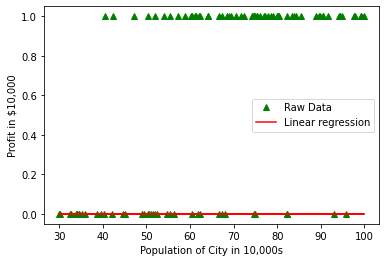

In [67]:
def main():
    data = MaxMinNorm()
    X, y = readData('/content/gdrive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data1.txt')
    X_scl = data.normalizeData(X)
    n = X_scl.shape[1]
    w = np.zeros((n, 1))
    alpha = 0.01
    n_iters = 2000
    model = LogisticRegression()
    w_opt, J_hist = model.gradientDescent(X_scl, y, w, alpha, n_iters)
    print("Kết quả : ")
    print('Trọng số tối ưu là:\n', w_opt)
    print('Giá trị Loss tối ưu: ', J_hist[-1])
    visualizeDataAndModel(X, y, w)

if __name__ == "__main__":
    main()